In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np
import seaborn as sns

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data = pd.read_csv("/content/drive/MyDrive/dataset/kidney-stone-dataset.csv")

In [59]:
#cleaning data.
#check for missing values.
data.isnull().sum()

Unnamed: 0    0
gravity       0
ph            0
osmo          0
cond          0
urea          0
calc          0
target        0
dtype: int64

In [60]:
#removing missing values
data.dropna(inplace=True)

In [61]:
#check for duplicates:
data.duplicated().sum()

0

In [62]:
#remove duplicates
data.drop_duplicates(inplace=True)

In [63]:
data.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  90 non-null     int64  
 1   gravity     90 non-null     float64
 2   ph          90 non-null     float64
 3   osmo        90 non-null     int64  
 4   cond        90 non-null     float64
 5   urea        90 non-null     int64  
 6   calc        90 non-null     float64
 7   target      90 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 6.3 KB


In [67]:
#'unnamed' columns will not be used when creating model because they will have no effect on classification
data.drop(["Unnamed: 0"],axis=1,inplace=True)
# "axis=1" When axis=1 column is dropped
# "inplace=True" The changing saved in the data

In [15]:
P= data[data.target==1]
N= data[data.target==0]

In [16]:
P.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 45 to 89
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45 non-null     int64  
 1   gravity     45 non-null     float64
 2   ph          45 non-null     float64
 3   osmo        45 non-null     int64  
 4   cond        45 non-null     float64
 5   urea        45 non-null     int64  
 6   calc        45 non-null     float64
 7   target      45 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 3.2 KB


In [17]:
N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 0 to 44
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  45 non-null     int64  
 1   gravity     45 non-null     float64
 2   ph          45 non-null     float64
 3   osmo        45 non-null     int64  
 4   cond        45 non-null     float64
 5   urea        45 non-null     int64  
 6   calc        45 non-null     float64
 7   target      45 non-null     int64  
dtypes: float64(4), int64(4)
memory usage: 3.2 KB


<function matplotlib.pyplot.show(close=None, block=None)>

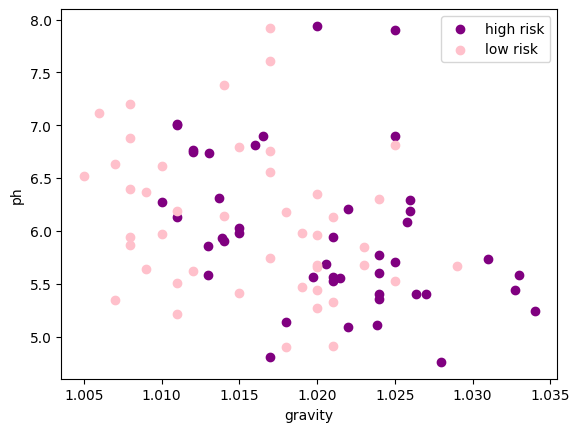

In [23]:
plt.scatter(P.gravity,P.ph,color="purple",label="high risk")
plt.scatter(N.gravity,N.ph,color="pink",label="low risk")
plt.legend()
plt.xlabel("gravity")
plt.ylabel("ph")
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

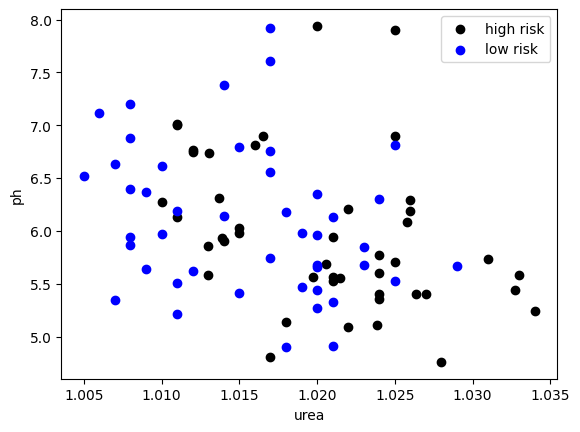

In [32]:
plt.scatter(P.gravity,P.ph,color="black",label="high risk")
plt.scatter(N.gravity,N.ph,color="blue",label="low risk")
plt.legend()
plt.xlabel("urea")
plt.ylabel("ph")
plt.show

In [34]:
y= data.target.values 

In [40]:
x_data = data.iloc[:,:]

In [41]:
#normalization
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [42]:
#train test  split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [43]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)#n_neghbors -> k değeri
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
y_head = knn.predict(x_test)
y_head

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1])

In [48]:
print("when k is {} accuracy of knn classification {} ".format(3,knn.score(x_test,y_test)))

when k is 3 accuracy of knn classification 1.0 


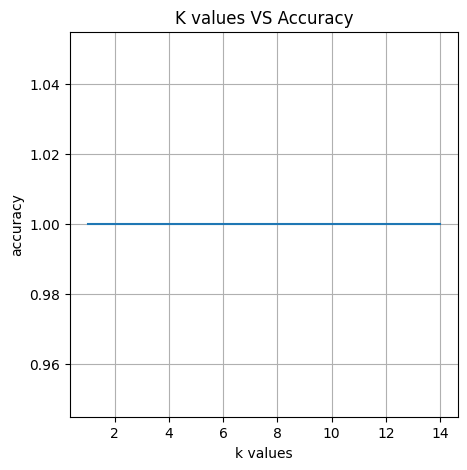

best accuracy is 1.0 with k = 1


In [49]:
#find k value
test_accuracy = []
for each in range(1,15):
  knn2=KNeighborsClassifier(n_neighbors=each)
  knn2.fit(x_train,y_train)
  test_accuracy.append(knn2.score(x_test,y_test))

plt.figure(figsize=(5,5))
plt.plot(range(1,15),test_accuracy)
plt.title('K values VS Accuracy')
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.grid()
plt.show()
print("best accuracy is {} with k = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))  

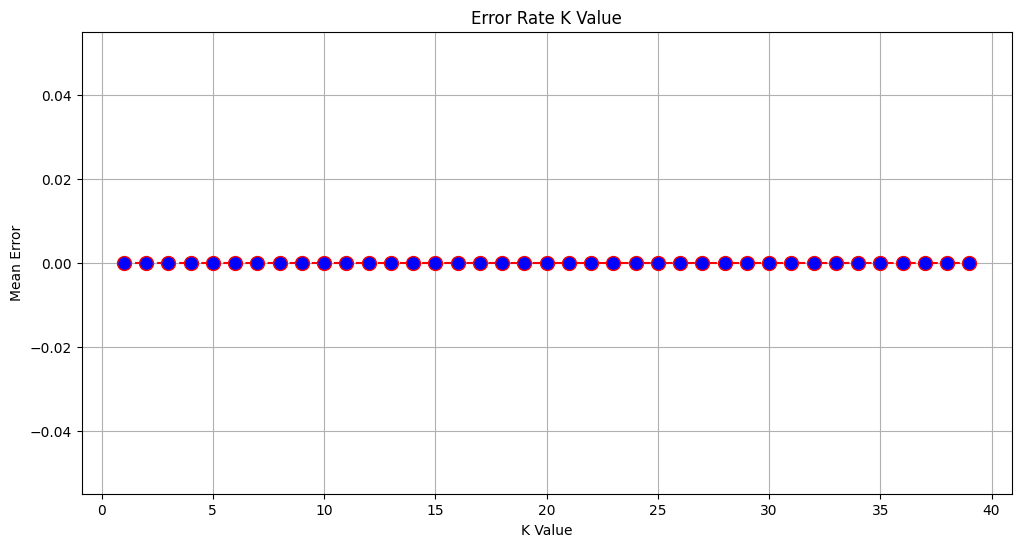

In [50]:
error = []
for i in range (1,40):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()
plt.show()

In [54]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_head)

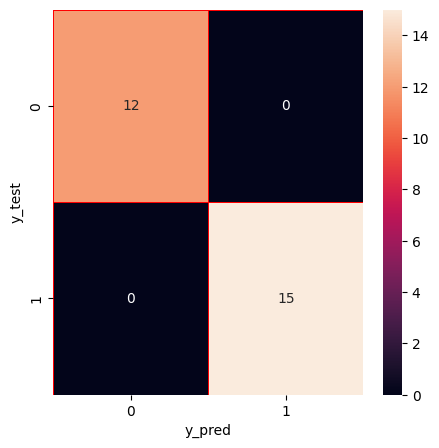

In [55]:
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm,annot=True,fmt= '.0f',linewidths=0.5,linecolor="red",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()